## Simple Regression Example

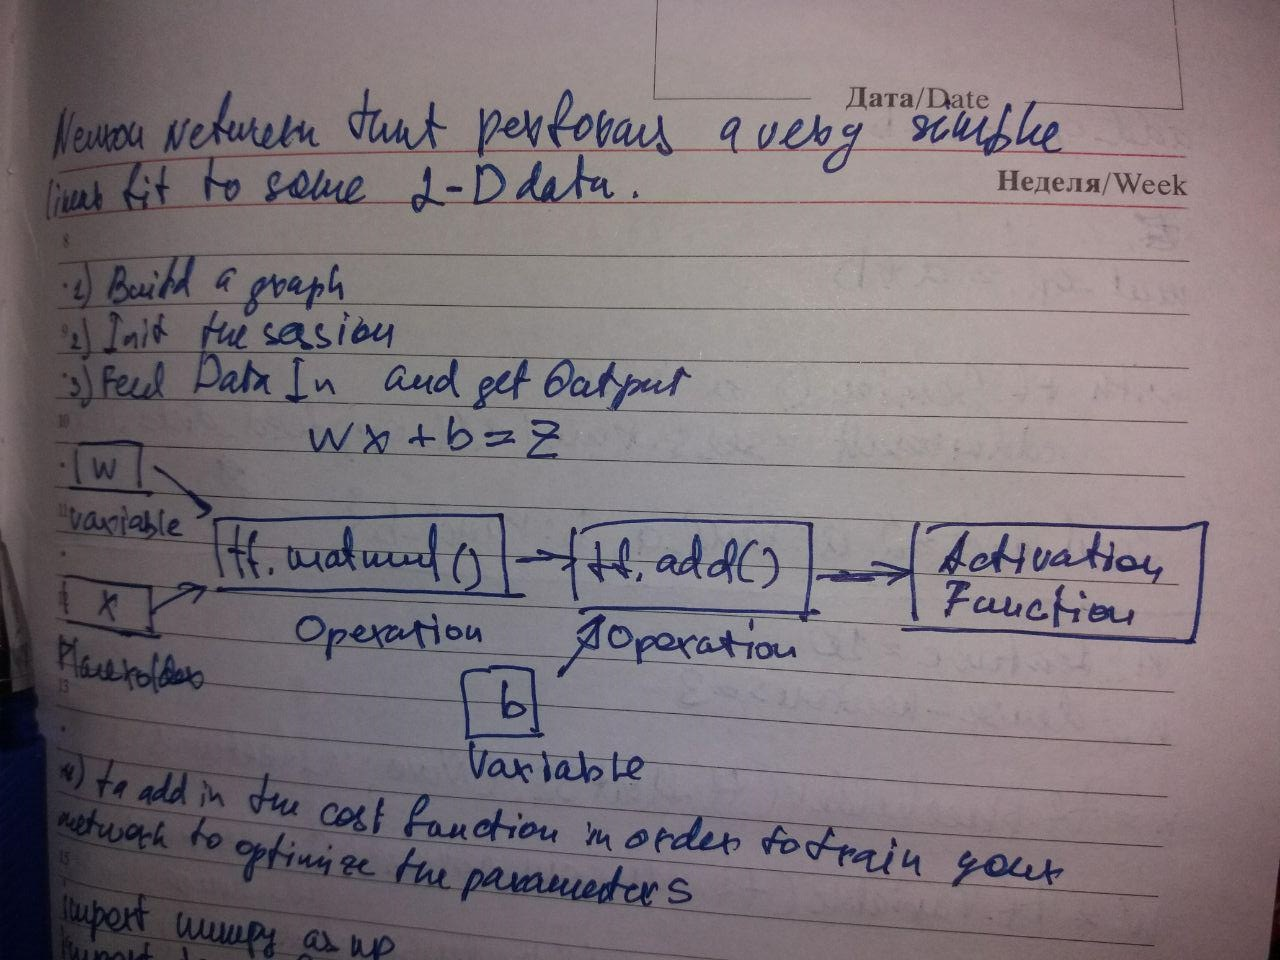

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(101)
np.random.seed(101)

n_features = 10
n_dense_neuros = 3

## Create a random data

In [2]:
_w_,_b_ = np.random.rand(2)
POINTS = 1000
MARGIN = 0.00001

In [3]:
def noising():
    return np.random.uniform(-1.5, 1.5, POINTS)

def teach_me(x):
    return _w_ * x + _b_
    
data = np.linspace(0,10,POINTS) + noising()
labels = np.linspace(0,10,POINTS) + noising()


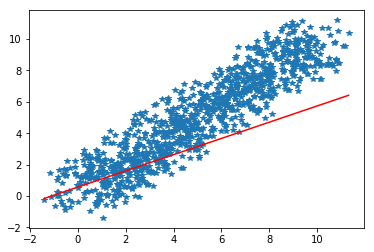

In [4]:
plt.plot(data, labels, '*')
plt.plot(data, teach_me(data), 'r')


In [5]:
W = tf.Variable(_w_)
b = tf.Variable(_b_)    

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
error = 0
for d,l in zip(data, labels):
    l_hat = W*d + b
    error += (l-l_hat)**2

In [7]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=MARGIN)

In [8]:
train = optimizer.minimize(error)

In [9]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    training_steps = 1000
    for s in range(training_steps):
        sess.run(train)
    final_slope, final_intersept = sess.run([W,b])
    

## Testing

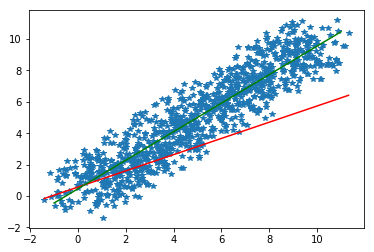

In [10]:
data_test = np.linspace(-1,11,POINTS)
label_test = final_slope * data_test + final_intersept

plt.plot(data, labels, '*')
plt.plot(data, teach_me(data), 'r')
plt.plot(data_test, label_test, 'g')